# Аналитика в авиакомпании

## Открытие данных и изучение общей информации

In [1]:
import plotly.express as px
import pandas as pd 
import numpy as np
import warnings

warnings.filterwarnings('ignore')

Прочитаем данные из файлов:

In [2]:
df1 = pd.read_csv('query_1.csv', sep=',')
df1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
flights_amount,8.0,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0


In [4]:
df3 = pd.read_csv('query_2.csv', sep=',')
df3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [5]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194


## Проверка типов данных

Проверим типы данных на корректность:

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Изменим тип данных у столбцов flights_amount и average_flights:

In [8]:
df1['flights_amount'] = np.uint16(df1['flights_amount'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      uint16
dtypes: object(1), uint16(1)
memory usage: 208.0+ bytes


In [9]:
df3['average_flights'] = np.float16(df3['average_flights'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float16
dtypes: float16(1), object(1)
memory usage: 1.1+ KB


In [10]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.496094,13.117188,1.0,2.0,3.0,5.871094,129.75


## Исследовательский анализ данных

Выберем топ-10 городов по количеству рейсов

In [11]:
df_top = df3.sort_values(by='average_flights', ascending=False).head(10)
df_top

,city,average_flights
43,Москва,129.750000
70,Санкт-Петербург,31.156250
54,Новосибирск,17.328125
33,Красноярск,11.578125
20,Екатеринбург,11.320312
67,Ростов-на-Дону,10.195312
63,Пермь,10.132812
10,Брянск,10.000000
74,Сочи,9.609375
84,Ульяновск,9.578125


Построим графики: 

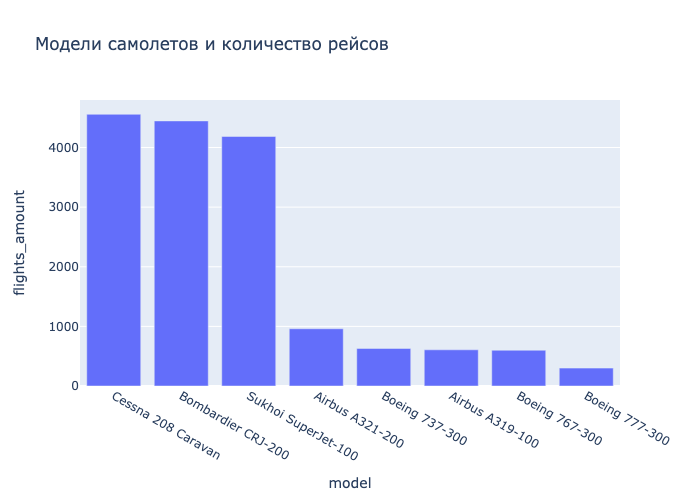

In [13]:
fig = px.bar(df1.sort_values(by='flights_amount', ascending=False), x="model", y="flights_amount", barmode="group",
            title='Модели самолетов и количество рейсов')
fig.show(renderer="png")

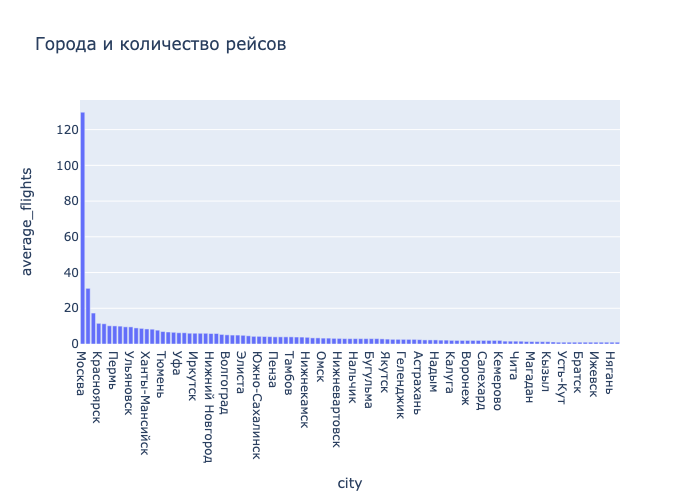

In [14]:
fig = px.bar(df3.sort_values(by='average_flights', ascending=False), x="city", y="average_flights", barmode="group",
            title='Города и количество рейсов')
fig.show(renderer="png")

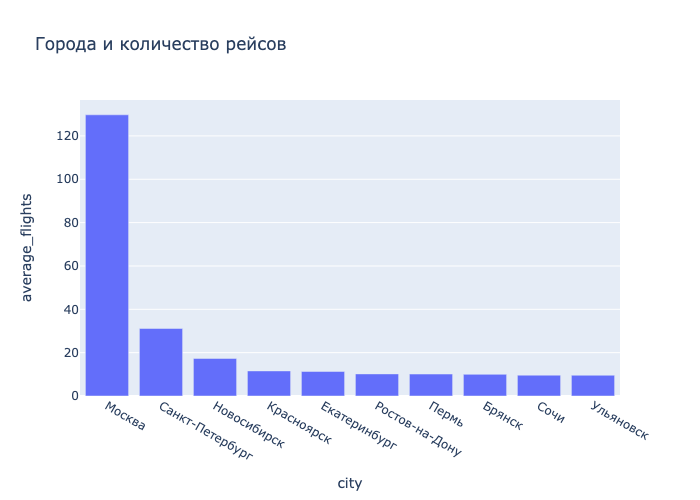

In [15]:
fig = px.bar(df_top.sort_values(by='average_flights', ascending=False), x="city", y="average_flights", barmode="group",
            title='Города и количество рейсов')
fig.show(renderer="png")

## Выводы

### Первый график

По графику моделей самолетов и кол-ву рейсов в сентябре 2018 года можно увидеть, что выделяются следующие модели: Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100

Рассмотрим описание этих моделей:
* Cessna 208 Caravan: американский лёгкий самолёт общего назначения с неубирающимся шасси. Используется на авиалиниях малой протяжённости.
* Bombardier CRJ-200: семейство региональных самолётов, производимых канадской компанией Bombardier.
* Sukhoi SuperJet-100: российский пассажирский самолёт, предназначенный для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км.

При этом для сравнения:
* Boeing 737: пассажирский самолёт, является самым массовым пассажирским самолётом за всю историю пассажирского авиастроения.

Компания может специализироваться на внутренних авиалиниях, между малыми городами и будет меньшая протяженность, меньшее кол-во пассажиров. А крупные пассажирские самолеты могут быть использованы для перелетов на авиалиниях с большой загрузкой (например, Москва-Питер) или большой протяженности, Москва-Владивосток

### Второй график

По информации о городах и среднем количестве рейсов, прибывающих в них за день в августе 2018 года и по построенному графику выделяется Москва с большим отрывом от других городов (почти 130 прилётов в день). Далее Питер и Новосибирск. 

### Третий график

В топ-10 по количеству рейсов и городам уверенно лидирует Москва, как это было видно на предыдущем графике. Здесь видна уже весь топ. Располагаются почти согласно кол-ву населения, но удивительно, что нет городов Нижний Новгород, Казань, Челябинск, Самара, Омск (сравнивала с топом по населению здесь https://www.sites.google.com/site/ruregdatav1/largest_cities_russia)